# Ergodicity and Density Dynamics simulations

The parameters are saved in the file `parameters.jl`. Let's start by importing the module `ThermostattedDynamics`

In [1]:
include("../src/ThermostattedDynamics.jl")

ThermostattedDynamics

In [2]:
using ThermostattedDynamics

Let's import the parameters file

In [3]:
include("parameters.jl")

ThermostattedDynamics.Integrator{ODE.#ode4}("RK4",ODE.ode4)

And codify them in the predefined type Parameters

In [4]:
parameters = Parameters(T, Q, dtsampling, dt, nsimulations, nsteps, thermo, potential, integrator)

ThermostattedDynamics.Parameters(1.0,0.1,0.0125,0.0025,50,50000,ThermostattedDynamics.Thermostat{##1#2}("logistic",#1),ThermostattedDynamics.Potential{##3#4}("quartic",#3),ThermostattedDynamics.Integrator{ODE.#ode4}("RK4",ODE.ode4))

You may change the parameters from here. For instance, let's change the integrator from a Runge Kutta RK4 with fixed stepsize to an adaptative RK45 (the integrator, for the moment, must be supported in the package [ODE.jl](https://github.com/JuliaDiffEq/ODE.jl)

In [5]:
parameters.integrator

ThermostattedDynamics.Integrator{ODE.#ode4}("RK4",ODE.ode4)

In [35]:
parameters.integrator = Integrator("RK45", ode45)

ThermostattedDynamics.Integrator{ODE.#ode45_dp}("RK45",ODE.ode45_dp)

We are ready to calculate the Lyapunov Spectrum for `nsimulations` initial conditions

In [36]:
parameters.nsimulations

50

And let's compute the lyapunov exponents by calling the function `lyapunov_exponents`

In [8]:
lyap = lyapunov_exponents(parameters)

10×6 Array{Float64,2}:
 0.256362  -0.00439341   -0.249659  -0.491986   -0.636552     0.215329 
 0.246428  -0.00877708   -0.242377   0.879305    1.81461      0.398991 
 0.256391  -0.00496057   -0.247167  -0.931282   -1.70154     -0.203288 
 0.265833  -0.00149062   -0.258657   0.207835   -0.745403    -0.122622 
 0.235783  -0.00175102   -0.23334    0.531828   -1.73996     -0.226096 
 0.229179  -0.00185503   -0.229112  -0.755076    0.00900776   0.342201 
 0.243859  -0.00106196   -0.245735   1.43276     1.6492      -0.134513 
 0.257361   0.000190783  -0.258759   0.124446    0.298596    -0.25182  
 0.229129  -0.000536237  -0.227475  -0.0227518  -0.604413     0.0579992
 0.232019  -0.00447419   -0.228991  -0.701199   -0.3566       0.278474 

The data is generated in the format

$$\lambda_1 \quad \lambda_2 \quad \lambda_3 \quad q_0 \quad p_0 \quad \zeta_0 \quad$$

Let's see what are the maximum and minimum of the first exponent

In [9]:
maximum(lyap[:,1]), minimum(lyap[:,1])

(0.26583266626955704,0.22912871740515875)

You may save the generated data with the function `save_lyapunov`. For that let's choose a filename

In [10]:
filename = "lyapunovdata"
save_lyapunov(filename, lyap, parameters)

The file lyapunovdata.hdf5 was saved in the folder `../data/`


Now, let's integrate an initial random condition for a total time equal to `nsteps*dt*nsimulations` by calling the function `trajectory`. The parameter `nsimulations` indicates how many parts of the trajectory are generated. Each part contains a segment of length `nsteps*dt`

In [6]:
trajec = trajectory(parameters)

Part 1 done. 
Part 2 done.
Part 3 done.
Part 4 done.
Part 5 done.
Part 6 done.
Part 7 done.
Part 8 done.
Part 9 done.
Part 10 done.
Part 11 done.
Part 12 done.
Part 13 done.
Part 14 done.
Part 15 done.
Part 16 done.
Part 17 done.
Part 18 done.
Part 19 done.
Part 20 done.
Part 21 done.
Part 22 done.
Part 23 done.
Part 24 done.
Part 25 done.
Part 26 done.
Part 27 done.
Part 28 done.
Part 29 done.
Part 30 done.
Part 31 done.
Part 32 done.
Part 33 done.
Part 34 done.
Part 35 done.
Part 36 done.
Part 37 done.
Part 38 done.
Part 39 done.
Part 40 done.
Part 41 done.
Part 42 done.
Part 43 done.
Part 44 done.
Part 45 done.
Part 46 done.
Part 47 done.
Part 48 done.
Part 49 done.
Part 50 done.


500001×5 Array{Float64,2}:
    0.0     -0.677432   1.54671   -0.15543      0.0      
    0.0125  -0.657289   1.67571   -0.135453    -0.0777957
    0.025   -0.635567   1.79803   -0.110188    -0.146302 
    0.0375  -0.612408   1.90355   -0.0797709   -0.20169  
    0.05    -0.5881     1.97976   -0.0449945   -0.239551 
    0.0625  -0.563086   2.01476   -0.00743909  -0.255886 
    0.075   -0.53793    2.00225    0.0306881   -0.248618 
    0.0875  -0.513218   1.94484    0.0670454   -0.218608 
    0.1     -0.489455   1.85264    0.099732    -0.169214 
    0.1125  -0.466994   1.73844    0.127604    -0.104826 
    0.125   -0.446038   1.61357    0.150254    -0.0295837
    0.1375  -0.426664   1.48638    0.167798     0.053194 
    0.15    -0.408865   1.36225    0.180658     0.141039 
    ⋮                                                    
 6249.86     0.0715647  0.27813   -0.124441     1.39697  
 6249.88     0.0751672  0.298747  -0.135902     1.32545  
 6249.89     0.0790459  0.322379  -0.147198  

The data is generated in the format 
    $$t \quad q \quad p \quad \zeta$$
You may plot it

## Invariant

In [22]:
H =  [potential.f(x) for x in trajec[:,2]] + trajec[:,3].^2 
I = H - [log(thermo.distribution(k)) for k in trajec[:,4]]./(1./T) + trajec[:,5]./(1./T)

500001-element Array{Float64,1}:
 2.08014 
 2.28799 
 2.50044 
 2.69573 
 2.8437  
 2.91362 
 2.88848 
 2.77518 
 2.60012 
 2.39506 
 2.18579 
 1.98864 
 1.81184 
 ⋮       
 0.922512
 0.928458
 0.935797
 0.944861
 0.956062
 0.969923
 0.987092
 1.00838 
 1.03481 
 1.06763 
 1.1084  
 1.15903 

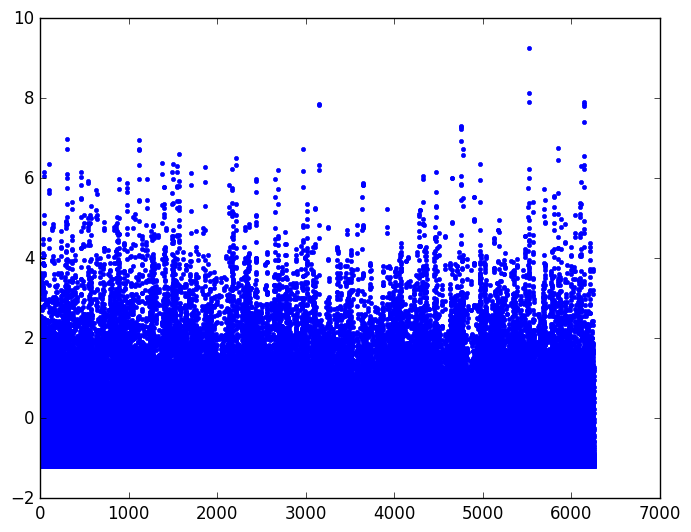

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0ea527d450>

In [24]:
plot(trajec[:,1],I-I[1],".")

In [18]:
using PyPlot

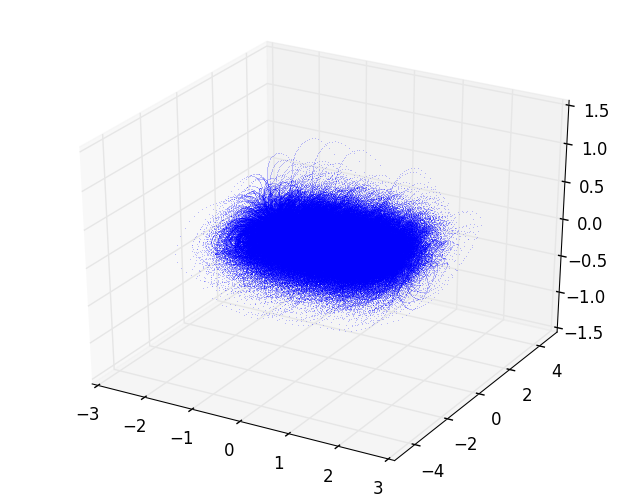

In [10]:
plot3D(trajec[:,2], trajec[:,3], trajec[:,4], ".", ms = 0.5, alpha = 0.3);

You may save the trajectory in an .hdf5 file with the command `save_trajectory`

In [11]:
filename = "trajecquart"
save_trajectory(filename, trajec, parameters)

The file trajecquart.hdf5 was saved in the folder `../data/`


## Poincaré sections

In [16]:
tr = trajec[:,1:4]

500001×4 Array{Float64,2}:
    0.0     -0.532625  0.707323  -0.044244 
    0.0125  -0.523645  0.730022  -0.0502921
    0.025   -0.514361  0.755877  -0.055897 
    0.0375  -0.504734  0.784921  -0.0609838
    0.05    -0.494725  0.817135  -0.0654668
    0.0625  -0.484293  0.852496  -0.0692586
    0.075   -0.473399  0.890945  -0.0722649
    0.0875  -0.462007  0.932254  -0.0743812
    0.1     -0.450083  0.976163  -0.0755024
    0.1125  -0.437593  1.02237   -0.075521 
    0.125   -0.424516  1.07026   -0.0743367
    0.1375  -0.410835  1.11909   -0.0718601
    0.15    -0.396538  1.16804   -0.0680055
    ⋮                                      
 6249.86     0.548819  0.611354  -0.241672 
 6249.88     0.556863  0.676964  -0.248993 
 6249.89     0.565772  0.750634  -0.255165 
 6249.9      0.575661  0.833231  -0.259837 
 6249.91     0.586648  0.925618  -0.262645 
 6249.93     0.598852  1.02868   -0.263219 
 6249.94     0.612413  1.14322   -0.261008 
 6249.95     0.627481  1.26972   -0.255312 
 6249

In [17]:
zsection = section(tr, parameters, "z")

LoadError: LoadError: BoundsError: attempt to access 3-element Array{Float64,1} at index [4]
while loading In[17], in expression starting on line 1

The generated array has the same structure than the array generated by the function `trajectory`

In [16]:
psection = section(trajec, parameters, "p")

386×4 Array{Float64,2}:
    0.839379  -1.40536   -9.62265e-13  -0.246547  
    7.35323   -1.27865   -4.74255e-13  -0.0785568 
   13.6064    -1.23556   -4.81197e-13  -0.100468  
   20.5324    -1.77794   -3.47484e-13   0.0751807 
   28.4717    -1.77332   -5.88142e-13  -0.0902246 
   35.3155    -1.20754   -3.59902e-13   0.0604    
   41.4453    -1.20967   -2.56041e-13  -0.0457521 
   48.3708    -1.85907   -3.98108e-13   0.207494  
   56.1092    -1.32985   -4.58873e-13  -0.164072  
   62.544     -1.24612   -5.48031e-13  -0.149596  
   69.7294    -1.71629   -3.39944e-14  -0.0492275 
   76.4442    -1.15474   -9.86227e-13  -0.00374297
   83.1657    -1.70578   -7.14828e-13   0.0294261 
    ⋮                                             
 1181.19       1.40475    6.93596e-13  -0.0567242 
 1187.1        0.864234   9.83092e-14  -0.0194835 
 1193.04       1.37277    5.77904e-13   0.00353083
 1199.03       0.876123   4.17874e-13   0.0439872 
 1204.97       1.45719    6.36263e-13   0.130871  
 1211.9

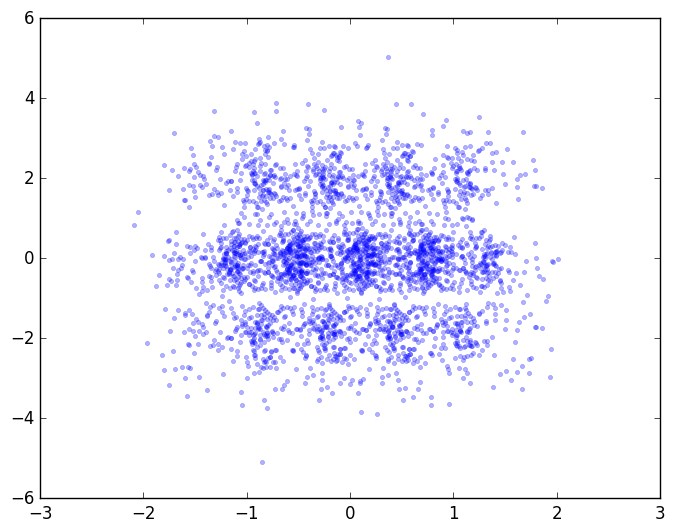

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f2bded938d0>

In [17]:
plot(zsection[:,2], zsection[:,3], ".", alpha = 0.3)

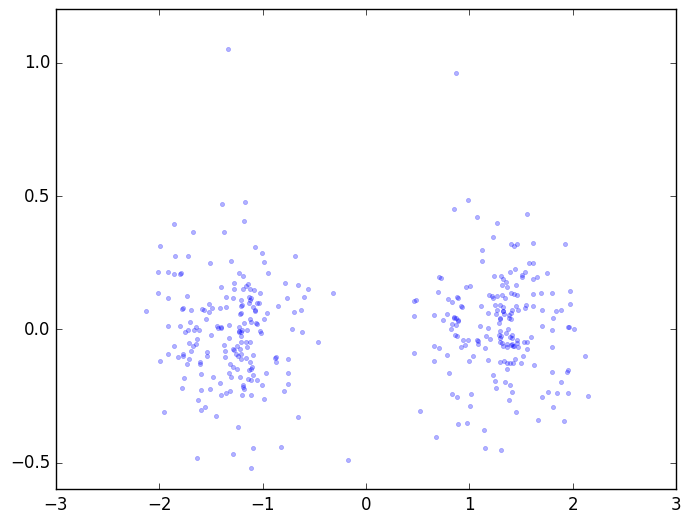

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f2bdeccbed0>

In [18]:
plot(psection[:,2], psection[:,4], ".", alpha = 0.3)

## Marginal distributions

The normalization factor $Z$ corresponds to the configurational partition function, i.e.
    
$$ \rho(q) = \frac{e^{-\beta V(q)}}{Z} $$

$$ Z = \int_{-\infty}^{\infty} e^{-\beta V(q)} $$

For the quartic potential with $\beta = 1.0$, $Z = 2.563693352$

In [18]:
Z = 2.563693352
data_marg = marginaldistributions(tr, parameters, Z)

500001×6 Array{Float64,2}:
 -0.532625  0.382293  0.707323  0.310649   -0.044244   2.38154 
 -0.523645  0.382799  0.730022  0.305622   -0.0502921  2.34835 
 -0.514361  0.383296  0.755877  0.299808   -0.055897   2.31446 
 -0.504734  0.383784  0.784921  0.293174   -0.0609838  2.28124 
 -0.494725  0.384264  0.817135  0.285706   -0.0654668  2.25017 
 -0.484293  0.384735  0.852496  0.277395   -0.0692586  2.22264 
 -0.473399  0.385195  0.890945  0.268252   -0.0722649  2.20005 
 -0.462007  0.385645  0.932254  0.258338   -0.0743812  2.18377 
 -0.450083  0.386081  0.976163  0.247738   -0.0755024  2.17502 
 -0.437593  0.386503  1.02237   0.236559   -0.075521   2.17487 
 -0.424516  0.386908  1.07026   0.224997   -0.0743367  2.18411 
 -0.410835  0.387294  1.11909   0.213286   -0.0718601  2.20313 
 -0.396538  0.387659  1.16804   0.201675   -0.0680055  2.23186 
  ⋮                                                    ⋮       
  0.548819  0.381315  0.611354  0.330941   -0.241672   0.751978
  0.556863  0

The data is saved in the format
$$q \quad \rho(q) \quad p \quad \rho(p) \quad \zeta \quad \rho(\zeta)  $$

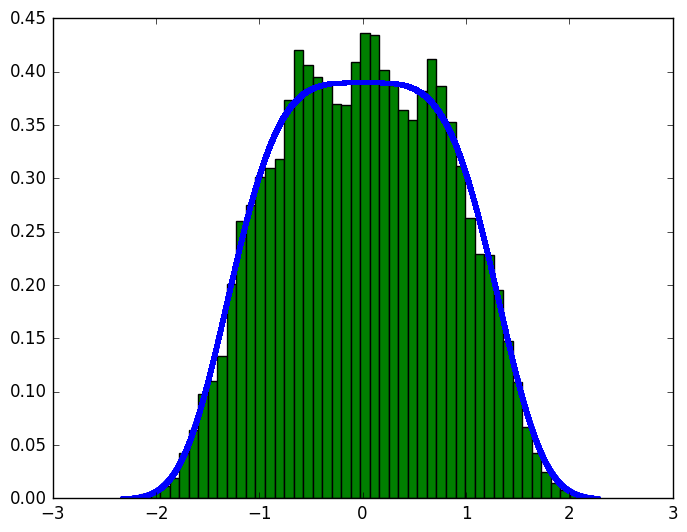

In [19]:
plot(data_marg[:,1], data_marg[:,2], ".", lw = 0.2)
plt[:hist](data_marg[:,1], 50, normed = true);

As long as the trajectory is increased, the correspondence between the histogram and the theoretical marginal distribution improves

## Hellinger distance

In [20]:
?hellingerdistance

search: hellingerdistance



This function returns the hellinger distance calculated in n (10 by default) different intervals of a trajectory together with its error. The normalization factor associated with the distribution in `q` is passed as an argument. Example:

```
julia> hellingerdistance(data, parameters, normalizationfactor, n)
```


In [21]:
data_hell = hellingerdistance(tr, parameters, Z)

1
2
3
4
5
6
7
8


LoadError: LoadError: InterruptException:
while loading In[21], in expression starting on line 1

The data is returned in the format $$time \quad hellinger \quad error $$

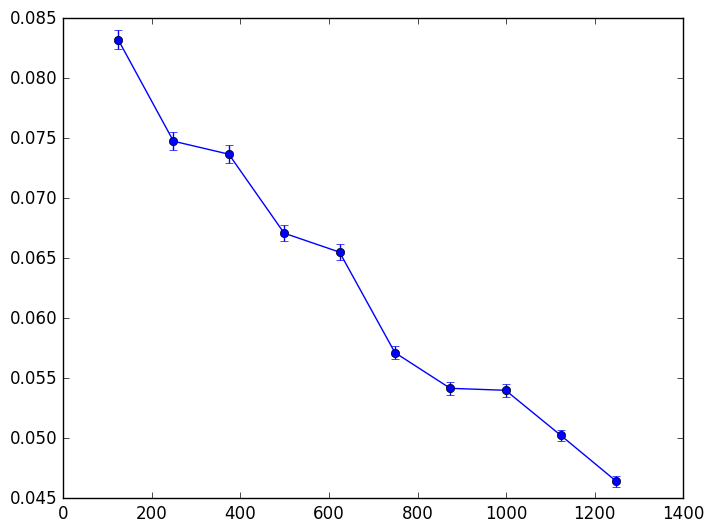

In [24]:
plt[:errorbar](data_hell[:,1], data_hell[:,2], yerr = data_hell[:,3], fmt = "o-");

As long as the trajectory is increased, the correspondence between the histogram and the theoretical marginal distribution improves

## Other thermostats

Consider, for instance, the Nosé-Hoover thermostat. In the density dynamics formalism it is given by

In [24]:
thermo = Thermostat("Nose-Hoover", x-> 1.0 / sqrt(T*2*pi*Q) *exp(-x^2./(T*2*Q))) 

ThermostattedDynamics.Thermostat{##5#6}("Nose-Hoover",#5)

In [25]:
parameters.thermo = thermo
parameters.potential = Potential("Harmonic", x->x^2./2.0)

ThermostattedDynamics.Potential{##7#8}("Harmonic",#7)

In [29]:
trajNH = trajectory(parameters)

Part 1 done. 
Part 2 done.
Part 3 done.
Part 4 done.
Part 5 done.
Part 6 done.
Part 7 done.
Part 8 done.
Part 9 done.
Part 10 done.


100001×4 Array{Float64,2}:
    0.0     -0.295468  0.00296057   0.0178663 
    0.0125  -0.295408  0.00664709   0.00536665
    0.025   -0.295301  0.0103405   -0.00713244
    0.0375  -0.295149  0.0140511   -0.0196306 
    0.05    -0.294952  0.0177868   -0.0321278 
    0.0625  -0.294708  0.0215602   -0.0446234 
    0.075   -0.294416  0.0253847   -0.057117  
    0.0875  -0.294076  0.0292736   -0.0696081 
    0.1     -0.293686  0.0332403   -0.0820961 
    0.1125  -0.293245  0.037298    -0.0945806 
    0.125   -0.292752  0.0414601   -0.107061  
    0.1375  -0.292205  0.04574     -0.119537  
    0.15    -0.291603  0.050151    -0.132007  
    ⋮                                         
 1249.86     1.33467   0.472014    -0.138651  
 1249.88     1.34052   0.463688    -0.148417  
 1249.89     1.34627   0.455705    -0.158276  
 1249.9      1.35191   0.448058    -0.168223  
 1249.91     1.35747   0.440742    -0.178253  
 1249.92     1.36294   0.433754    -0.188363  
 1249.94     1.36832   0.427089  

In [30]:
zsNH = section(trajNH, parameters, "z")

1461×4 Array{Float64,2}:
    0.0178669  -0.295368   0.00823139   9.92773e-14
    1.76632     0.804344  -0.166098     9.98416e-13
    3.21456    -0.411007  -0.239854     4.41797e-13
    5.10556    -1.48648    0.497788     7.17314e-13
    6.43569    -0.222716   0.601051     1.17075e-13
    7.69521     0.993928   0.587888     2.77082e-13
    9.40573     2.28283   -0.37996      6.59742e-13
   10.9019      0.881704  -0.765665     1.62615e-13
   12.0629     -0.264334  -0.720298     3.93846e-13
   13.3077     -1.48228   -0.772473     3.67943e-13
   15.7315     -0.61106    0.275288     5.58438e-13
   17.1343      0.61392    0.27483      7.72493e-13
   19.6087      1.47142   -0.776287     4.07751e-13
    ⋮                                              
 1230.41        0.942193  -1.28771     -9.87798e-13
 1232.07       -0.666081  -1.26833     -6.41211e-13
 1233.6        -2.03544   -2.04043     -7.63323e-13
 1234.61       -2.06605    1.61383     -4.84509e-13
 1236.09       -0.670602   1.16641     

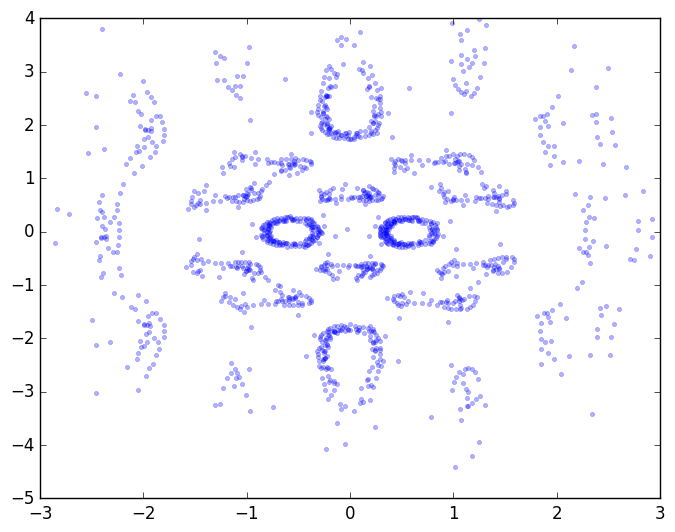

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0cd6255710>

In [31]:
plot(zsNH[:,2],zsNH[:,3], ".", alpha = 0.3)